# Exploratory Data Analysis(EDA) on Residential Properties in Bangalore selected location where IT companies are located.

Our ultimate goal is to find the residential properties with the requirements of a IT professional which are shown stated below which states that there are four requirements i.e, price to be between 40-80 lakhs, the area should be greater than 1000 sqft, the property should be a 2 or 3 bhk which is located in the areas Whitefield, Marathalli, Sajjapur Raod, Electronic City, Kanakpura Road, Hebbal.

Importing the necessary libraries and dataset from Kaggle

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')    # To suppress all the warnings in the notebook.
pd.set_option('mode.chained_assignment', None) # To suppress pandas warnings.
np.set_printoptions(precision=4) # To display values only upto four decimal places.
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
df=pd.read_csv("C://Users/Pro/Downloads/Bengaluru_House_Data.csv")
df.sample(8)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
6091,Super built-up Area,Ready To Move,Kaikondrahalli,3 BHK,NaN,1605,3.0,3.0,105.0
8634,Super built-up Area,Ready To Move,Hennur,2 BHK,SLureSi,1020,2.0,1.0,48.0
8307,Super built-up Area,18-Apr,TC Palaya,3 BHK,NaN,1200,2.0,0.0,66.0
1906,Super built-up Area,Ready To Move,Sarjapur,2 BHK,Sondaka,950,2.0,2.0,32.5
2415,Super built-up Area,Ready To Move,HRBR Layout,3 BHK,NaN,1567,3.0,3.0,90.0
6328,Built-up Area,Ready To Move,Yelahanka,1 BHK,NaN,651,1.0,1.0,17.5
4615,Super built-up Area,Ready To Move,Yelahanka,2 BHK,Niareum,1326,2.0,2.0,57.0
8281,Super built-up Area,19-Dec,Thanisandra main road,3 BHK,NaN,3144,3.0,1.0,455.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


### Handling nulls

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.drop(df[['area_type','society']], axis=1, inplace=True) # deleting the unimportant features

In [7]:
df = df.dropna(how='any',axis=0)
df.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [8]:
df.shape

(12710, 7)

### Data Types

In [9]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print(categorical)

There are 4 categorical variables
['availability', 'location', 'size', 'total_sqft']


In [10]:
numeric = [num for num in df.columns if df[num].dtype!='O']
print('There are {} numeric variables'.format(len(numeric)))
numeric

There are 3 numeric variables


['bath', 'balcony', 'price']

In [11]:
# let's visualise the values of the discrete variables 
# from all the numerical ones, those that contain a finite and small number of distinct values

discrete=[]
for var in numeric:
    if len(df[var].unique())<45:
        print (var, ' values: ', df[var].unique())
        discrete.append(var)
print('There are {} discrete variables'.format(len(discrete)))

bath  values:  [ 2.  5.  3.  4.  1.  8.  7.  6.  9. 27. 11. 12. 10. 40. 15. 13.]
balcony  values:  [1. 3. 2. 0.]
There are 2 discrete variables


In [12]:
# continous variables 
continuous = [var for var in numeric if var not in discrete]
continuous

['price']

In [13]:
# let's visualise the values of the categorical variables
for var in categorical:
    print(var, ' values: ', df[var].unique())

availability  values:  ['19-Dec' 'Ready To Move' '18-Feb' '18-Nov' '18-May' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '18-Apr' '20-Aug' '19-Mar' '17-Sep'
 '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan' '18-Aug' '19-Jan'
 '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep' '17-May' '17-Jun'
 '18-Oct' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun' '22-Jun'
 '19-Jul' '21-Feb' '19-May' '17-Nov' '20-Oct' '20-Jun' '19-Feb' '21-Oct'
 '21-Jan' '17-Mar' '17-Apr' '22-May' '19-Oct' '21-Jul' '21-Nov' '21-Mar'
 '16-Dec' '22-Mar' '20-Jan' '21-Sep' '21-Aug' '14-Nov' '19-Nov' '16-Jul'
 '15-Jun' '20-Nov' '20-Jul' '16-Sep' '20-Feb' '15-Dec' '16-Oct' '22-Nov'
 '15-Aug' '17-Jan' '16-Nov' '20-Apr' '16-Jan' '17-Feb' '14-Jul']
location  values:  ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
size  values:  ['2 BHK' '4 Bedroom' '3 BHK' '3 Bedroom' '1 BHK' '1 RK' '4 BHK'
 '1 B

In [14]:
# let's inspect at the number of labels for the different categorical variables

print ('unique values in "availability" variable: ', len(df['availability'].unique()))
print ('unique values in "location" variable: ', len(df['location'].unique()))
print ('unique values in "size" variable: ', len(df['size'].unique()))
print ('unique values in "total_sqft"  variable: ', len(df['total_sqft'].unique()))

unique values in "availability" variable:  78
unique values in "location" variable:  1265
unique values in "size" variable:  27
unique values in "total_sqft"  variable:  1976


In [15]:
# most frequent
print(df['availability'].unique())
availabililty= df['availability'].value_counts()
availabililty.head(10)

['19-Dec' 'Ready To Move' '18-Feb' '18-Nov' '18-May' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '18-Apr' '20-Aug' '19-Mar' '17-Sep'
 '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan' '18-Aug' '19-Jan'
 '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep' '17-May' '17-Jun'
 '18-Oct' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun' '22-Jun'
 '19-Jul' '21-Feb' '19-May' '17-Nov' '20-Oct' '20-Jun' '19-Feb' '21-Oct'
 '21-Jan' '17-Mar' '17-Apr' '22-May' '19-Oct' '21-Jul' '21-Nov' '21-Mar'
 '16-Dec' '22-Mar' '20-Jan' '21-Sep' '21-Aug' '14-Nov' '19-Nov' '16-Jul'
 '15-Jun' '20-Nov' '20-Jul' '16-Sep' '20-Feb' '15-Dec' '16-Oct' '22-Nov'
 '15-Aug' '17-Jan' '16-Nov' '20-Apr' '16-Jan' '17-Feb' '14-Jul']


Ready To Move    10077
18-Dec             291
18-May             282
18-Apr             261
18-Aug             200
19-Dec             182
18-Jul             140
18-Mar             118
20-Dec              98
18-Jun              96
Name: availability, dtype: int64

In [16]:
print(df['location'].unique())
location= df['location'].value_counts()
location.head(10)
## Look at most frequent 

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


Whitefield               514
Sarjapur  Road           372
Electronic City          300
Kanakpura Road           261
Thanisandra              231
Yelahanka                206
Uttarahalli              186
Hebbal                   173
Raja Rajeshwari Nagar    168
Marathahalli             164
Name: location, dtype: int64

In [17]:
print(df['size'].unique())
size= df['size'].value_counts()
size.head(10)

['2 BHK' '4 Bedroom' '3 BHK' '3 Bedroom' '1 BHK' '1 RK' '4 BHK'
 '1 Bedroom' '2 Bedroom' '6 Bedroom' '8 Bedroom' '7 Bedroom' '5 BHK'
 '7 BHK' '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK'
 '11 Bedroom' '43 Bedroom' '14 BHK' '8 BHK' '12 Bedroom' '10 Bedroom'
 '13 BHK']


2 BHK        5152
3 BHK        4128
4 Bedroom     749
1 BHK         530
3 Bedroom     527
4 BHK         489
2 Bedroom     328
5 Bedroom     263
6 Bedroom     169
1 Bedroom     105
Name: size, dtype: int64

In [18]:
print(df['total_sqft'].unique())
total_sqft= df['total_sqft'].value_counts()
total_sqft.head(10)

['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


1200    788
1100    218
1500    198
2400    177
600     172
1000    170
1350    130
1050    122
1300    115
1250    110
Name: total_sqft, dtype: int64

#### 'size' feature

In [19]:
# feature size
df.rename(columns = {'size':'BHK'}, inplace = True)
df.head(3)

,availability,location,BHK,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00


In [20]:
# removing the 'Bedrooms, BHK' words and retaining only the numeric
df.BHK=df.BHK.str.split(' ').str[0]
# converting the feature into integer
df.BHK=df.BHK.astype(int)
df.BHK.head().transpose()

0    2
1    4
2    3
3    3
4    2
Name: BHK, dtype: int32

In [21]:
df.head()

,availability,location,BHK,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00


#### 'availability' feature

In [22]:
# converting the feature dates to under construction
df.availability=df.availability.replace([['19-Dec']], 'under_construction')

df.availability=df.availability.replace([['18-Feb' ,'18-Nov', '18-May' ,'20-Dec',
 '17-Oct' ,'21-Dec', '19-Sep' ,'20-Sep' ,'18-Mar' ,'18-Apr', '20-Aug', '19-Mar',
 '17-Sep' ,'18-Dec' ,'17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
 '19-Jan', '17-Jul' ,'18-Jul' ,'21-Jun' ,'20-May', '19-Aug', '18-Sep', '17-May',
 '17-Jun' ,'18-Oct' ,'21-May', '18-Jan', '20-Mar' ,'17-Dec', '16-Mar', '19-Jun',
 '22-Jun' ,'19-Jul' ,'21-Feb' ,'19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb',
 '21-Oct' ,'21-Jan' ,'17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
 '21-Mar' ,'16-Dec', '22-Mar', '20-Jan' ,'21-Sep', '21-Aug', '14-Nov', '19-Nov',
 '16-Jul', '15-Jun' ,'20-Nov' ,'20-Jul', '16-Sep', '20-Feb', '15-Dec', '16-Oct',
 '22-Nov' ,'15-Aug' ,'17-Jan' ,'16-Nov', '20-Apr', '16-Jan', '17-Feb' ,
                                          '14-Jul']], 'under_construction')

print(df['availability'].unique())
availabililty= df['availability'].value_counts()
availabililty.head(10)

['under_construction' 'Ready To Move']


Ready To Move         10077
under_construction     2633
Name: availability, dtype: int64

##### 'total_sqft' feature (this feature treatment is adopted from https://www.kaggle.com/vinay0212/bengaluru-house-price-prediction vinay Tomar)

In [23]:
# Function to catch all non numeric and abnormal values:
def catch_abnormal_val(series):
    err_val = []
    for x in series:
        try:
            float(x)
        except:
            err_val.append(x)
    return err_val

In [24]:
catch_abnormal_val(df['total_sqft'])

['2100 - 2850',
 '3067 - 8156',
 '1042 - 1105',
 '1145 - 1340',
 '1015 - 1540',
 '34.46Sq. Meter',
 '1195 - 1440',
 '1120 - 1145',
 '3090 - 5002',
 '1160 - 1195',
 '1000Sq. Meter',
 '1115 - 1130',
 '520 - 645',
 '1000 - 1285',
 '650 - 665',
 '633 - 666',
 '5.31Acres',
 '30Acres',
 '1445 - 1455',
 '884 - 1116',
 '850 - 1093',
 '716Sq. Meter',
 '547.34 - 827.31',
 '580 - 650',
 '3425 - 3435',
 '1804 - 2273',
 '3630 - 3800',
 '4000 - 5249',
 '1500Sq. Meter',
 '142.61Sq. Meter',
 '1574Sq. Yards',
 '1250 - 1305',
 '670 - 980',
 '1005.03 - 1252.49',
 '3630 - 3800',
 '1004 - 1204',
 '645 - 936',
 '2710 - 3360',
 '2830 - 2882',
 '596 - 804',
 '1255 - 1863',
 '1300 - 1405',
 '117Sq. Yards',
 '934 - 1437',
 '980 - 1030',
 '2249.81 - 4112.19',
 '1070 - 1315',
 '3040Sq. Meter',
 '500Sq. Yards',
 '2806 - 3019',
 '613 - 648',
 '704 - 730',
 '1210 - 1477',
 '3369 - 3464',
 '1125 - 1500',
 '167Sq. Meter',
 '1076 - 1199',
 '381 - 535',
 '524 - 894',
 '540 - 670',
 '2725 - 3250',
 '888 - 1290',
 '660 - 

Not just range values, we can see there are some numeric values written in sqft, perch, acres, yards, cents and ground formats.

In [25]:
# Lets modify the range format values first:
# function that will identfy range format values and convert them to single float value:
def convert_rng_val(x):
    values = x.split('-')
    if len(values) == 2:
        return (float(values[0])+float(values[1]))/2 #return float mean value of range
    try:
        return float(x) #return remaining values in float.
    except:
        return x #return other abnormal value as it is.


In [26]:
print(convert_rng_val('1200'))
print(convert_rng_val('1200-2349'))
print(convert_rng_val('1200sqft. Meter'))

1200.0
1774.5
1200sqft. Meter


In [27]:
def sqmt_to_sqft(x):
    """convert sq.meters to sqft"""
    return x * 10.764

def sqyards_to_sqft(x):
    """convert sq.yards to sqft"""
    return x * 9

def gunta_to_sqft(x):
    """convert gunta to sqft"""
    return x * 1089

def acres_to_sqft(x):
    """convert acres to sqft"""
    return x * 43560

def perch_to_sqft(x):
    """convert perch to sqft"""
    return x * 272.25

def grounds_to_sqft(x):
    """convert grounds to sqft"""
    return x * 2400

def cents_to_sqft(x):
    """convert cents to sqft"""
    return x * 435.6

In [28]:
import re
def clean_total_sqft(y):
    try:
        y = float(y)
    except:
        if "-" in y:
            y = round(convert_rng_val(y),1)
        elif "Sq. Meter" in y:
            y = round(sqmt_to_sqft(float(re.findall('\d+',y)[0])),1)
        elif "Sq. Yards" in y:
            y = sqyards_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Guntha" in y:
            y = gunta_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Acres" in y:
            y = acres_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Perch" in y:
            y = perch_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Grounds" in y:
            y = grounds_to_sqft(float(re.findall('\d+',y)[0])) 
        elif "Cents" in y:
            y = round(cents_to_sqft(float(re.findall('\d+',y)[0])),1)
        return y
    return y

In [29]:
clean_total_sqft("13Sq. Yards")

117.0

In [30]:
# Lets clean our column and create a cleaned version of it:
df['total_sqft_cleaned'] = df['total_sqft'].apply(lambda x : clean_total_sqft(x))
# lets check for abnormal values now :
catch_abnormal_val(df['total_sqft_cleaned'])

[]

In [31]:
# Remove unecessary columns:
df = df.drop(['total_sqft'], axis=1)
df.sample(10)

,availability,location,BHK,bath,balcony,price,total_sqft_cleaned
5012,Ready To Move,NRI Layout,2,2.0,2.0,35.00,1060.0
5079,under_construction,Whitefield,1,1.0,1.0,52.00,905.0
11663,Ready To Move,7th Phase JP Nagar,3,2.0,1.0,57.00,1075.0
4676,under_construction,Basavanapura,2,2.0,2.0,38.52,1095.0
1504,Ready To Move,Craig Park Layout,2,2.0,3.0,148.00,1010.0
3866,Ready To Move,6th block Koramangala,3,3.0,2.0,400.00,2350.0
11749,under_construction,OLd Gurappanapalya,3,3.0,2.0,39.00,1250.0
3903,Ready To Move,4th Block Jayanagar,2,2.0,1.0,70.00,900.0
6390,Ready To Move,Hegganahalli,1,1.0,0.0,48.00,1200.0
1372,Ready To Move,Kothannur,2,2.0,2.0,40.00,1100.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 7 columns):
availability          12710 non-null object
location              12710 non-null object
BHK                   12710 non-null int32
bath                  12710 non-null float64
balcony               12710 non-null float64
price                 12710 non-null float64
total_sqft_cleaned    12710 non-null float64
dtypes: float64(4), int32(1), object(2)
memory usage: 744.7+ KB


All columns are cleaned and no nan values remaining. Now we can proceed to feature engineering.

### Specified Price range 40 lakhs to 80 lakhs

In [35]:
d=df[(df['price']>=40)&(df['price']<=80)]
d.shape

(6021, 7)

when we consider the price range 40 to 80 Lakhs number of rows are reduced to 6021 that means there are only 6000 properties in this price range.

#### Required locations: Whitefield, Sajjapur Road, Electronic City,Kanakpura Road,Hebbal, Marathahalli

In [36]:
d1=d[(d['location']=='Whitefield')|(d['location']=='Sajjapur Road')|(d['location']=='Electronic City')|
     (d['location']=='Kanakpura Road')|(d['location']=='Hebbal')|(d['location']=='Marathahalli')]
d1.shape

(668, 7)

When we consider the mentioned locations we are left with only 668 properties.

### Client required area of >1000 sqft

In [37]:
d2=d1[(d1['total_sqft_cleaned']>=1000)]
d2.shape

(599, 7)

### Client required 3 or 2 BHK

In [38]:
d3=d2[(d2['BHK']==2)|(d2['BHK']==3)]
d3.shape

(597, 7)

In [39]:
d3['BHK'].value_counts()

2    376
3    221
Name: BHK, dtype: int64

In [40]:
d3.head()

,availability,location,BHK,bath,balcony,price,total_sqft_cleaned
8,Ready To Move,Marathahalli,3,3.0,1.0,63.25,1310.0
10,under_construction,Whitefield,3,2.0,2.0,70.00,1800.0
29,Ready To Move,Electronic City,3,2.0,1.0,47.00,1025.0
67,Ready To Move,Marathahalli,2,2.0,1.0,57.00,1220.0
112,Ready To Move,Whitefield,2,2.0,1.0,51.91,1116.0


#### Now let’s visualize

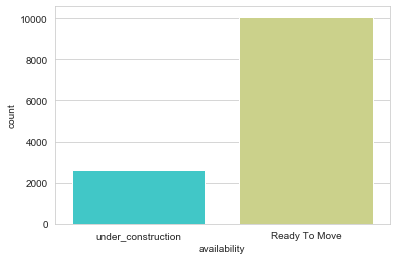

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='availability', data=df, palette='rainbow')

The above plot depicts that there 2 categories in building availability which are under_construction is almost 2300, Under construction properties to be almost 5000, Ready to move properties are 10000

Text(0.5, 1.0, 'Boxplot, price for houses by location')

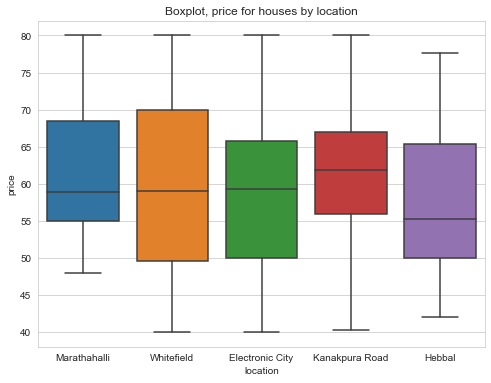

In [41]:
fig, ax = plt.subplots(figsize=[8, 6])
sns.boxplot(
    data=d3,
    y='price',
    x='location'
)
ax.set_title('Boxplot, price for houses by location')

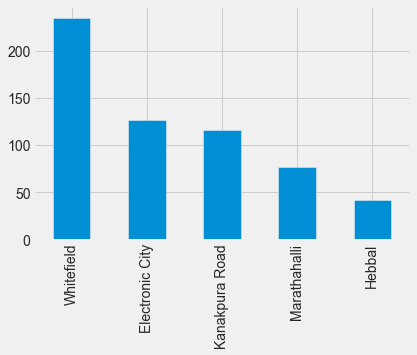

In [51]:
d4=d3['location'].value_counts()
d4.plot.bar()

No. of residential properties available in the given locations which are with the clients requirements of price 40-80 lakhs, BHK of 2-3, >1000 sq.feet

Text(0.5, 1.0, 'Boxplot, price for houses by no. of Bedrooms')

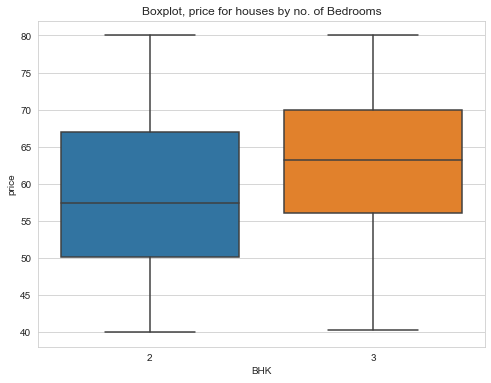

In [42]:
fig, ax = plt.subplots(figsize=[8, 6])
sns.boxplot(
    data=d3,
    y='price',
    x='BHK'
)
ax.set_title('Boxplot, price for houses by no. of Bedrooms')

The above figure is a box blot in which the two lines on both ends are called whiskers, the bottom line is the minimum value where the topmost line is the maximum value for each category i.e, 2 bhk and 3 bhk and the middle line inside the colored area specify the median which is also the 50th percentile. The plot describes that for 2 bhk the minimum price is 40 L and maximum price is 80 L, 25% of 2 bhk’s has their prices below 50 L whereas in 3 bhk the minimum starts at around 56 L and goes up to 80 L where 25% of 3 bhk’s has their price below 56 L.

Text(0.5, 1.0, 'Boxplot, price for houses by No. of balcony')

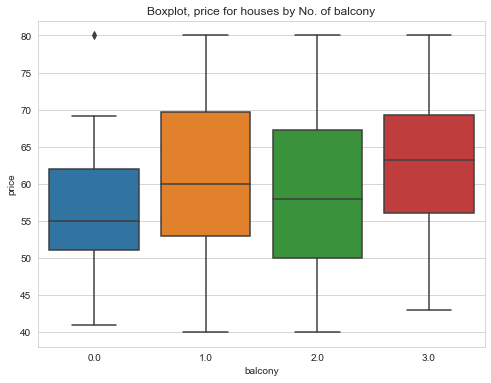

In [43]:
fig, ax = plt.subplots(figsize=[8, 6])
sns.boxplot(
    data=d2,
    y='price',
    x='balcony'
)
ax.set_title('Boxplot, price for houses by No. of balcony')

Text(0.5, 1.0, 'Boxplot, price for houses by no. of bathrooms')

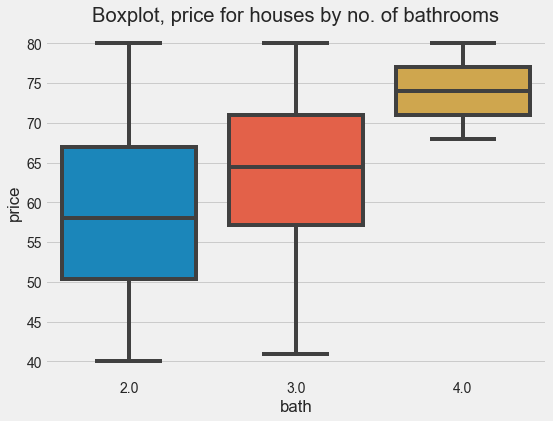

In [50]:
fig, ax = plt.subplots(figsize=[8, 6])
sns.boxplot(
    data=d3,
    y='price',
    x='bath'
)
ax.set_title('Boxplot, price for houses by no. of bathrooms')

Text(0.5, 1.0, 'Boxplot, price for houses by availability')

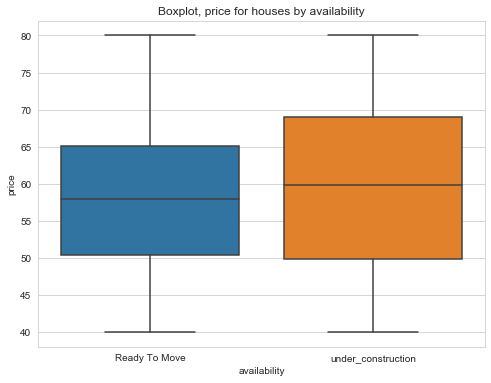

In [45]:
fig, ax = plt.subplots(figsize=[8, 6])
sns.boxplot(
    data=d1,
    y='price',
    x='availability'
)
ax.set_title('Boxplot, price for houses by availability')

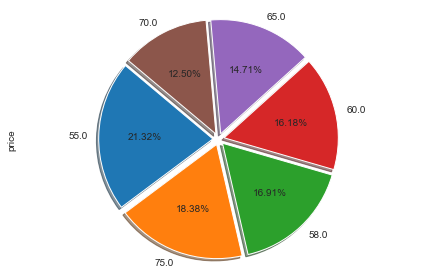

In [47]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)  
# Plot
d3['price'].value_counts(ascending=False).head(6).plot.pie(explode=explode,
autopct='%0.2f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.tight_layout()
plt.show() 

### This a pie plot for the price column it shows that 21.32% of properties have their price as 55 L and 18.38% properties to have 75 L. Each pie in the plot represents different percentages of prices.

#### Let’s see the distribution of prices

Text(0.5, 1.0, 'Price Distribution')

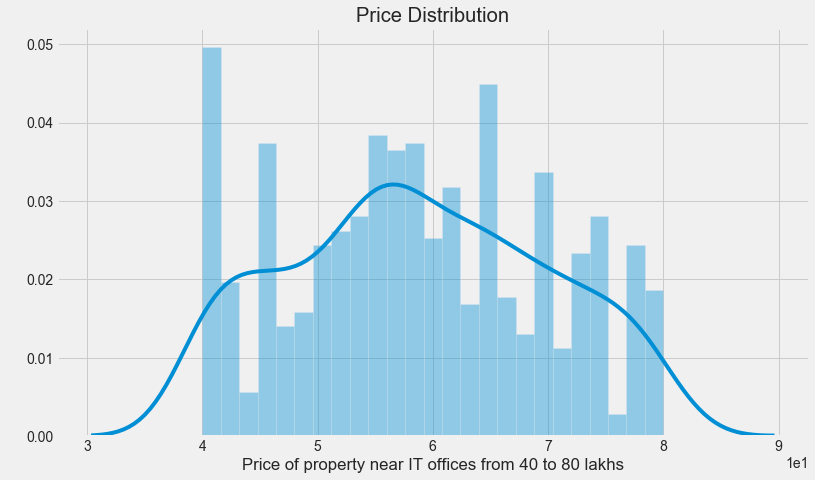

In [48]:
#Distribution of the target variable: Rating
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(d1['price'], bins=25)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,1))
plt.xlabel("Price of property near IT offices from 40 to 80 lakhs")
plt.ylabel(" ")
plt.title("Price Distribution")

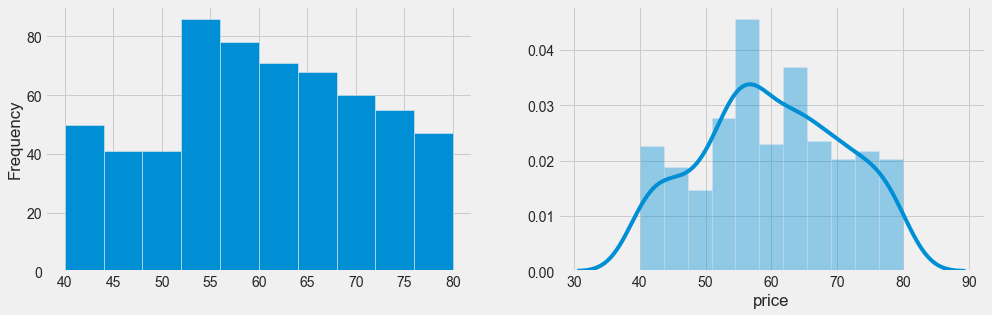

In [49]:
f,ax=plt.subplots(figsize=(15,10))
ax2=plt.subplot(223)
d3['price'].plot.hist()
ax2.plot
                 
ax3=plt.subplot(224)
sns.distplot(d3['price'],ax=ax3)

The left plot is a histogram in which x-axis represents the price and the y-axis represents the count/frequency of that price. The plot that is to the right is a distribution plot where the x-axis represents the price and the y-axis represents the probabilities of prices. For example, nearing 90 properties are having a price range of 52 to 57 Lakhs and almost a probability of 0.05 for having a price range of 55 to 57 lakhs.

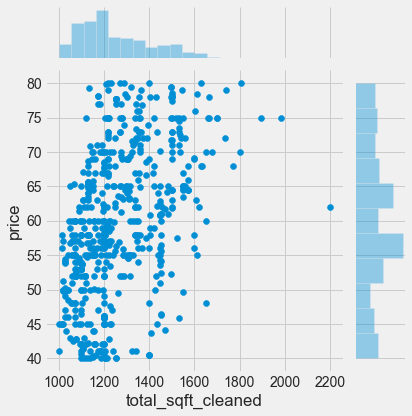

In [52]:
sns.jointplot(x='total_sqft_cleaned', y='price', data=d3)

From the above plot we can say that the relation between area and price by seeing the histograms on top of each axis of the plot. Surprisingly there is no increase in price with an increase in the area of the property(these assumptions are only for the data that we have got after applying the conditions that are specified)

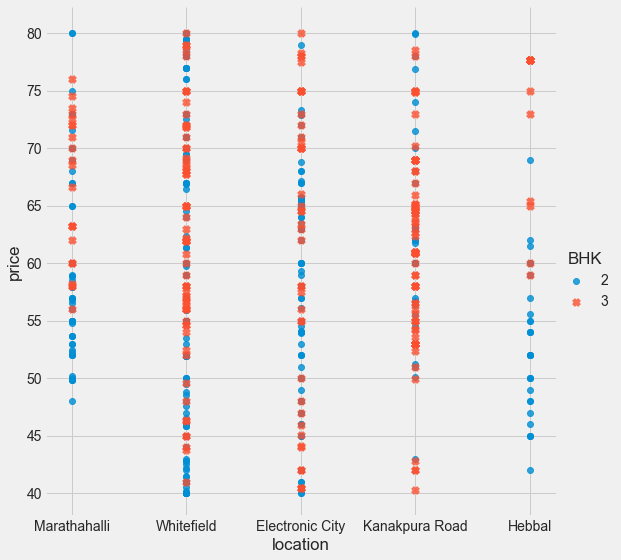

In [69]:
sns.lmplot(x='location', y='price', hue='BHK', data=d3, fit_reg=False, markers=["o", "x"], height=8, aspect=1)
plt.show()

We can see from the above plot that Whitefiled, Electronic City, Kanakpur Road has a wide range of prices from 40L to 80 L. In Marathahalli 2 BHK starts from 47 Lakhs. In Hebbal few houses are available, most of the 2BHK are <57 lakhs.

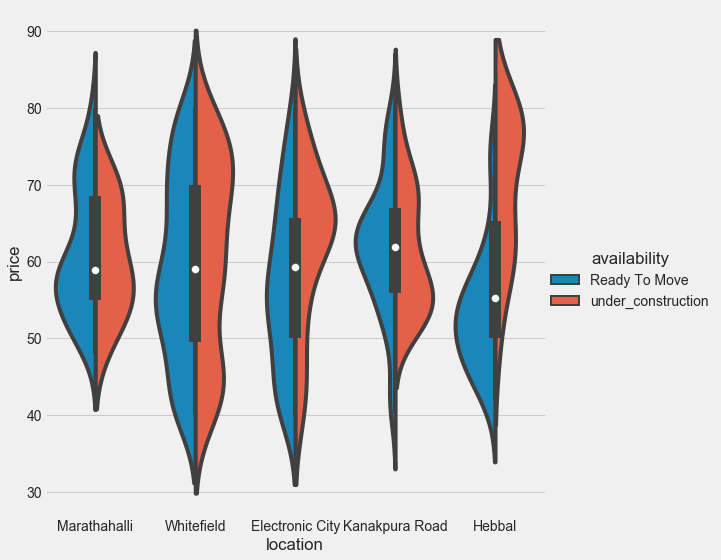

In [77]:
sns.catplot(x='location', y='price', hue='availability', split=True, kind='violin', data=d3, height=8, aspect=1);

This violin plot describes that all the location have both types of houses that are ready to move and under construction. Aslo Whitefield area has wide range of both 2 & 3 BHKs from price 40 to 80L. In Hebbal where most of the ready to move apartments have their prices less compared to under construction houses. 

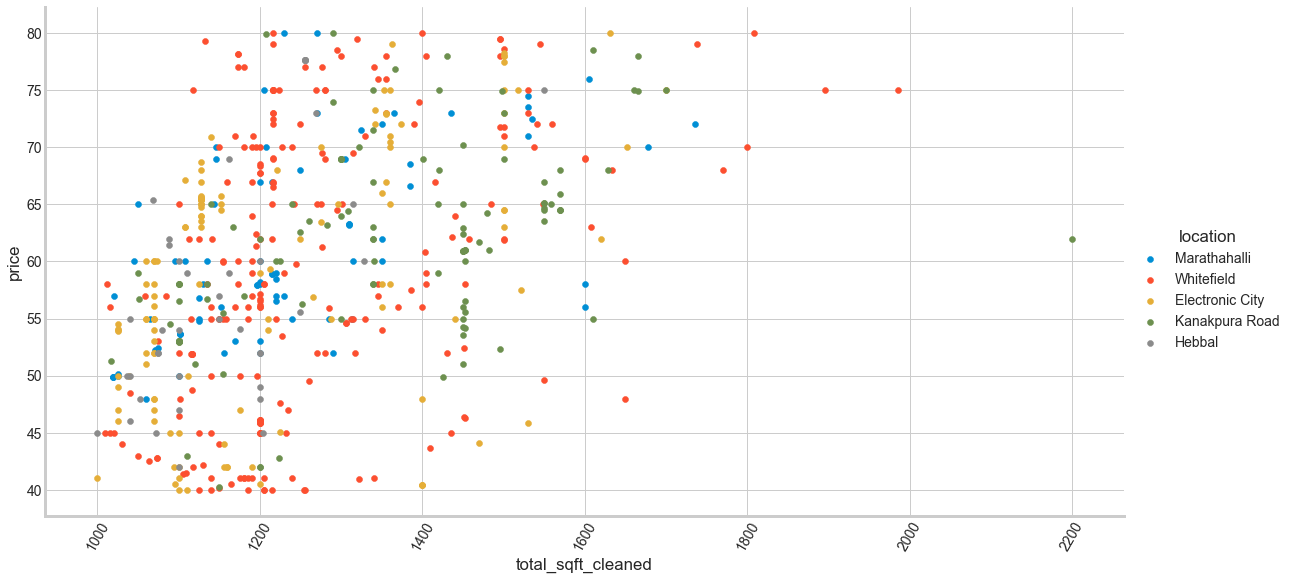

In [80]:
sns.set_style('whitegrid');
ax=sns.FacetGrid(d3, hue='location', height=8, aspect=2).map(plt.scatter,'total_sqft_cleaned', 'price').add_legend()
ax.set_xticklabels(rotation=60)
ax.set_xlabels()
plt.show()

We can see that most of the houses in Whitefield are bigger & are > 1800sqft between 70 and 80L, Also there is a property in Kanakpura Road which is very big with 2200 sqft and priced at 62 Lakhs

# Correlation

In [81]:
d3.corr()*100

,BHK,bath,balcony,price,total_sqft_cleaned
BHK,100.000000,68.252392,23.481593,18.821952,60.090944
bath,68.252392,100.000000,24.979348,21.656922,49.048834
balcony,23.481593,24.979348,100.000000,3.331362,27.681933
price,18.821952,21.656922,3.331362,100.000000,44.342788
total_sqft_cleaned,60.090944,49.048834,27.681933,44.342788,100.000000


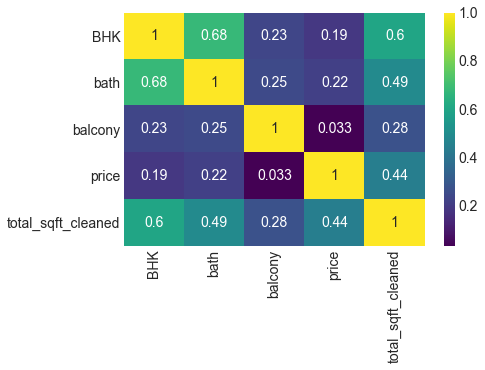

In [83]:
corr=d3.corr()
sns.heatmap(corr, annot=True, cmap='viridis')

Correlation: It defines the relationship between two features whether they are positively correlated or negatively correlated. Result of a correlation is called the correlation coefficient (or “r”).It ranges from -1.0 to +1.0. The closer r is to +1 or -1, the more closely the two variables are related. If r is close to 0, it means there is no relationship between the variables. If r is positive, it means that as one variable gets larger the other gets larger. If r is negative it means that as one gets larger, the other gets smaller (often called an “inverse” correlation).

No. of Bedrooms, No. of Bathroom are positively +60% related to sq.ft of the properties.  But none of the features have >50% correlation with our target variable 'price', sq.ft has just 44% relation with our target 'price.

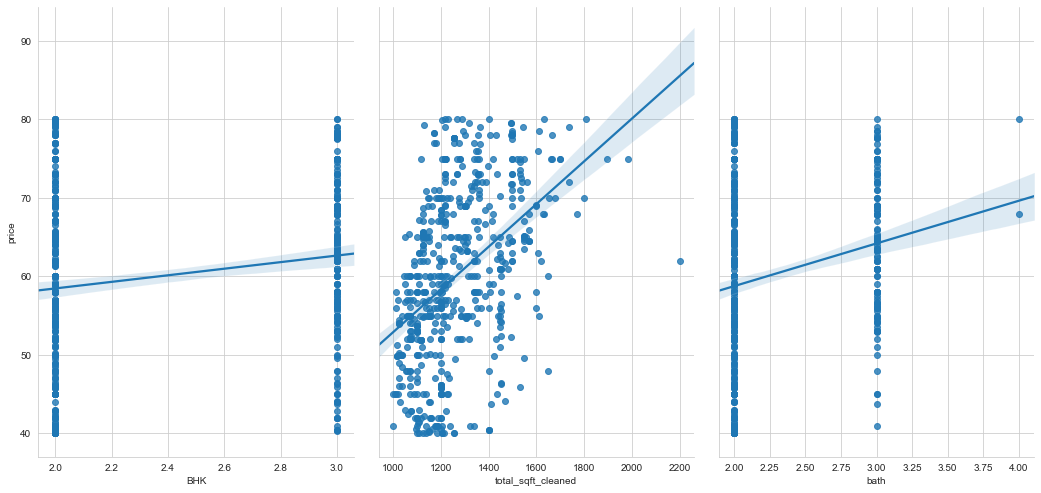

In [46]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(d3, x_vars=['BHK','total_sqft_cleaned','bath'], y_vars='price', size=7, aspect=0.7, kind='reg')

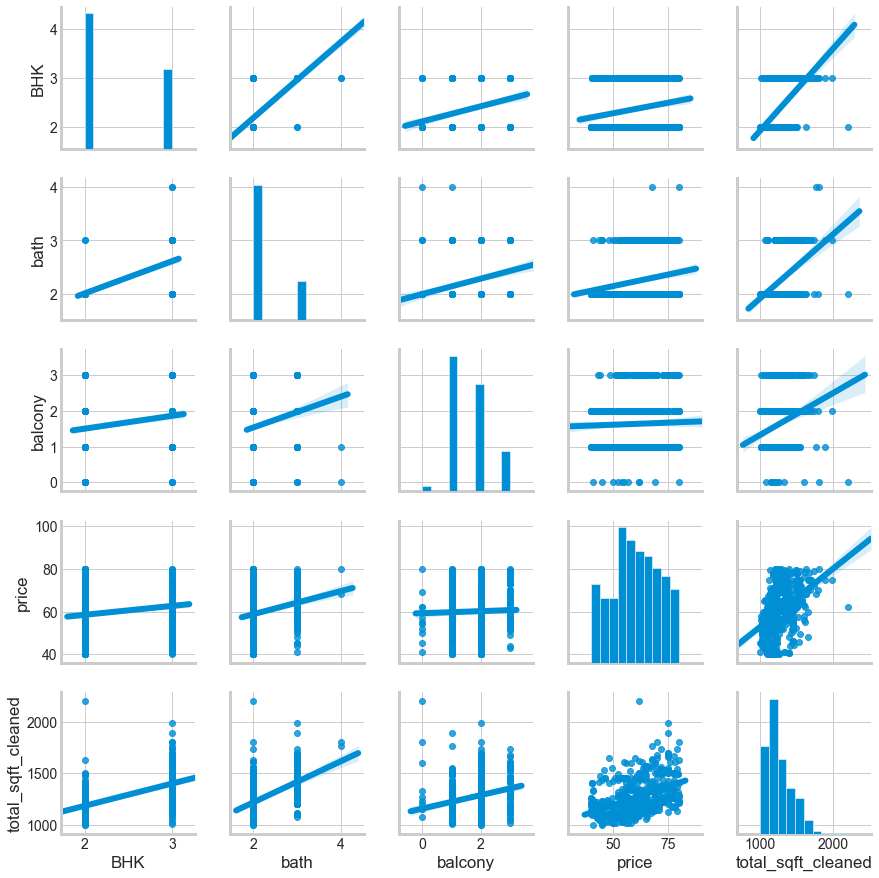

In [85]:
sns.pairplot(d3, kind='reg')

# Encoding categorical data


In [86]:
#Categorical boolean mask
categorical_feature_mask = d3.dtypes=='object'
#filter categorical columns using mask and turn it into a list
categorical_cols = d3.columns[categorical_feature_mask].tolist()

In [87]:
#import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
d3[categorical_cols] = d3[categorical_cols].apply(lambda col: le.fit_transform(col))
d3[categorical_cols].head(3)# apply OneHotEncoder on categorical feature columns

,availability,location
8,0,3
10,1,4
29,0,0


In [93]:
d3.head(3)

,availability,location,BHK,bath,balcony,price,total_sqft_cleaned
8,0,3,3,3.0,1.0,63.25,1310.0
10,1,4,3,2.0,2.0,70.00,1800.0
29,0,0,3,2.0,1.0,47.00,1025.0


### End of EDA

### Part 2 - trying out some regression models for fun

# Splitting X and y into training and testing sets

In [119]:
# seperating the dependent and independant variables
feature_cols = ['availability','location','BHK','bath','balcony','total_sqft_cleaned']
# you want all rows, and the feature_cols' columns
X = d3.loc[:, feature_cols]
# now we want to create our response vector
y=d3['price']
X.head(2)

,availability,location,BHK,bath,balcony,total_sqft_cleaned
8,0,3,3,3.0,1.0,1310.0
10,1,4,3,2.0,2.0,1800.0


In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=0)
print('The Shape of X_TRAIN is',X_train.shape)
print('The Shape of X_TEST is',X_test.shape)
print('The Shape of Y_TRAIN is',y_train.shape)
print('The Shape of Y_TEST is',y_test.shape)

The Shape of X_TRAIN is (417, 6)
The Shape of X_TEST is (180, 6)
The Shape of Y_TRAIN is (417,)
The Shape of Y_TEST is (180,)


# Base model Linear Regression 

In [104]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
print("co-efficient of determination R^2 on training set: {}".format(regressor.score(X_train, y_train)))

co-efficient of determination R^2 on training set: 0.2756136808940354


In [106]:
print("co-efficient of determination R^2 on test set: {}".format(regressor.score(X_test, y_test)))

co-efficient of determination R^2 on test set: 0.1782783581699502


In [107]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y, cv=5)
print (score.max())  # out of 5 the max score

0.2911860548734443


In [109]:
#prediction on test data.
y_pred = regressor.predict(X_test)
#Now compare the actual output values for X_test with the predicted values, execute the following script:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df2 = df1.head(25)
print(df2)

       Actual  Predicted
9062    65.00  57.666134
3017    47.00  53.615564
4522    64.00  60.374903
5246    61.45  58.400027
1707    70.00  71.333924
7787    69.00  73.735346
8228    55.00  54.014383
11587   57.00  58.214859
10732   78.00  71.341769
10104   65.00  54.969129
5567    51.00  52.581139
4511    55.00  58.214859
13185   73.00  69.216596
6313    58.00  60.960148
3535    75.00  73.037808
4944    62.00  62.669107
7940    67.77  58.631516
13257   58.00  60.876736
5890    49.00  57.813026
1014    53.00  54.779002
10113   55.00  58.674977
7143    78.20  61.501027
947     79.50  68.683366
4949    52.00  60.605106
9606    54.80  59.820578


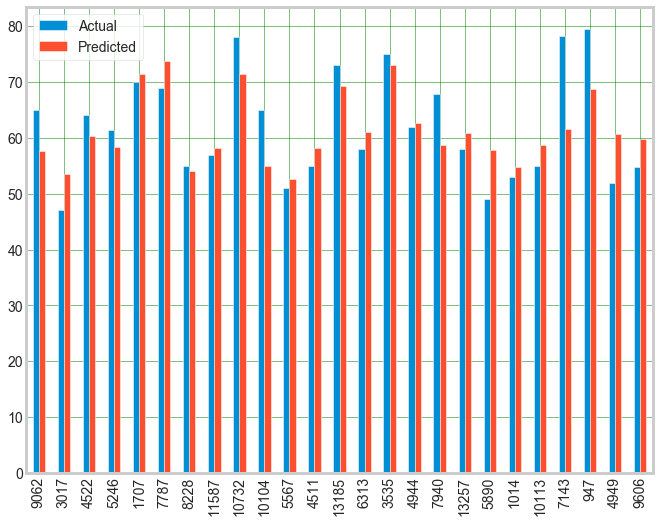

In [110]:
#The comparison plot of Actual and Predicted values
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [111]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_pred)

print("Results of metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of metrics:
MAE: 7.5384210784471835
MSE: 95.47991728791247
RMSE: 9.771382567882217
R-Squared: 0.1782783581699502


Regression accuracy metrics
The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.
MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

# Feature Importance

In [112]:
#import XGBoost classifier and accuracy
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instantiate model and train
model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model.fit(X_train, y_train)

# make predictions for test set
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

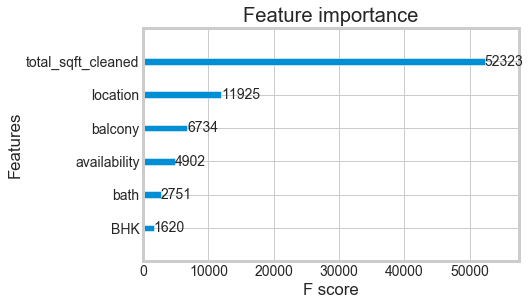

In [113]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(model)
plt.show()

In [114]:
feature_cols = ['location','total_sqft_cleaned'] #selecting only 2 imp features
X = d3.loc[:, feature_cols]
#  our response vector
y=d3['price']
X.head(2)

,location,total_sqft_cleaned
8,3,1310.0
10,4,1800.0


In [115]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=2)
print('The Shape of X_TRAIN is',X_train.shape)
print('The Shape of X_TEST is',X_test.shape)
print('The Shape of Y_TRAIN is',y_train.shape)
print('The Shape of Y_TEST is',y_test.shape)

The Shape of X_TRAIN is (417, 2)
The Shape of X_TEST is (180, 2)
The Shape of Y_TRAIN is (417,)
The Shape of Y_TEST is (180,)


In [116]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
print("co-efficient of determination R^2 on training set: {}".format(regressor.score(X_train, y_train)))

co-efficient of determination R^2 on training set: 0.2041926368228646


In [118]:
print("co-efficient of determination R^2 on test set: {}".format(regressor.score(X_test, y_test)))

co-efficient of determination R^2 on test set: 0.16401429198737139


not happy with results

# Best Model Selection

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor #(random_state=42,silent=True)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [89]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('ADA', AdaBoostRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBRegressor(silent=True))) # to silent the WARNING: C:/Jenkins/workspace/xgboost

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
results_e2 = []
names_e2 = []

for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10, random_state='seed')
    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2.append(cv_results)
    names_e2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -87.024664 (19.100561)
LASSO: -92.878150 (21.950750)
RIDGE: -86.977692 (19.207905)
EN: -91.880164 (21.996041)
KNN: -84.192873 (20.457301)
DT: -112.742892 (24.327991)
SVR: -96.656101 (23.247639)
ADA: -80.670236 (17.140597)
RF: -81.083238 (11.187642)
XGB: -71.062315 (13.739420)


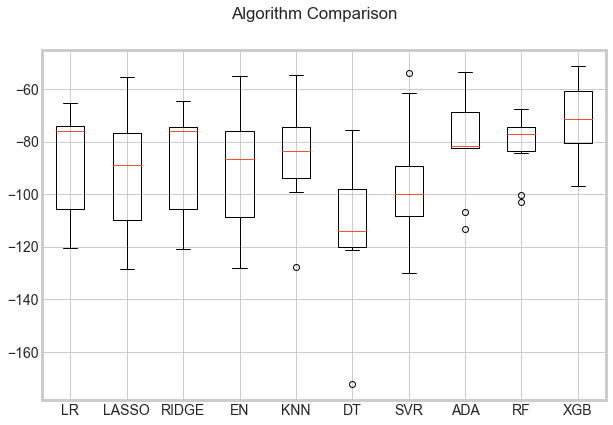

In [122]:
# Plot results
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2)
plt.show()

# XGBOOST Regressor


In [123]:
import xgboost as xgb
regressor=XGBRegressor(silent=True) # to silent the WARNING: C:/Jenkins/workspace/xgboo
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [125]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.6300757306549165


In [126]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.3622658627797689


In [127]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
score.mean()

0.38556109257768034

# Hyperparameter tuning


In [128]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [129]:

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [130]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [131]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor(silent=True) # to silent the WARNING: C:/Jenkins/workspace/xgboost

In [132]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [133]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   0.4s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  su

[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.3s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.4s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.5s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.5s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample

[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[CV]  subsample

[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   0.7s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  

[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.5s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.5s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   0.9s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[C

[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   0.8s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   0.8s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.2s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.2s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.2s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.2s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.3s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[CV]  subsample

[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.1s
[CV] subsample=0.7, n_est

[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.4s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.3s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.3s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   0.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   0.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   0.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subsam

[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[CV]  subsampl

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  3.8min finished
D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                             

In [134]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [135]:
xg_random.best_score_

-74.36989760783754

In [138]:
predictions=xg_random.predict(X_test)

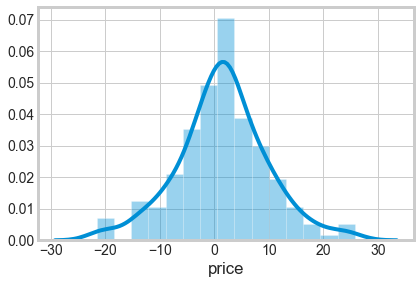

In [137]:
sns.distplot(y_test-predictions)

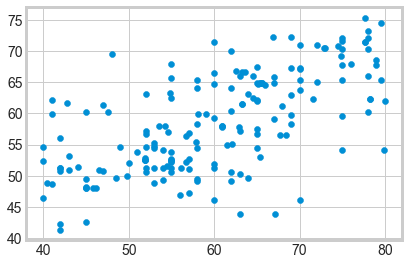

In [139]:
plt.scatter(y_test,predictions)

In [140]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R-Squared:", metrics.r2_score(y_test, predictions))

MAE: 6.361984349568685
MSE: 70.55097282092666
RMSE: 8.399462650725145
R-Squared: 0.39282246082906536


errors has reduced and R^2 has increased in small number.  this project was done for EDA purpose, the observations were also very less >600 after filtering.